# Time Series analysis tsa(时间序列分析)

http://www.statsmodels.org/stable/tsa.html

时间序列分析是根据系统观测得到的时间序列数据，通过曲线拟合和参数估计来建立数学模型的理论和方法。它一般采用曲线拟合和参数估计方法（如非线性最小二乘法）进行。时间序列分析常用在国民经济宏观控制、区域综合发展规划、企业经营管理、市场潜量预测、气象预报、水文预报、地震前兆预报、农作物病虫灾害预报、环境污染控制、生态平衡、天文学和海洋学等方面。

参考链接：

python时间序列分析之ARIMAhttps://blog.csdn.net/u010414589/article/details/49622625

AR(I)MA时间序列建模过程——步骤和python代码https://www.jianshu.com/p/cced6617b423

在Python和R语言中使用Auto ARIMA构建高性能时间序列模型https://www.ziiai.com/blog/638


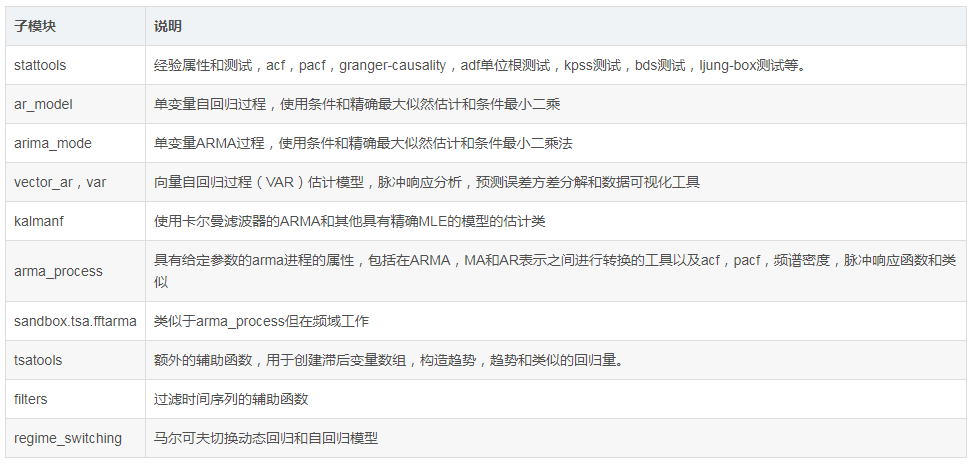

**常用模型**

常用的时间序列模型有四种：自回归模型 AR(p)AR(p)AR(p)、移动平均模型 MA(q)MA(q)MA(q)、自回归移动平均模型 ARMA(p,q)ARMA(p,q)ARMA(p,q)、自回归差分移动平均模型 ARIMA(p,d,q)ARIMA(p,d,q)ARIMA(p,d,q)

**ARMA模型**

自回归滑动平均模型（英语：Autoregressive moving average model，简称：ARMA模型）。是研究时间序列的重要方法，由自回归模型（简称AR模型）与移动平均模型（简称MA模型）为基础“混合”构成。
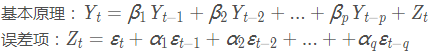

**ARIMA模型**

ARIMA模型（英语：AutoregressiveIntegratedMovingAverage model），差分整合移动平均自回归模型，又称整合移动平均自回归模型（移动也可称作滑动），时间序列预测分析方法之一。ARIMA（p，d，q）中，AR是"自回归"，p为自回归项数；MA为"滑动平均"，q为滑动平均项数，d为使之成为平稳序列所做的差分次数（阶数）。
当时间序列本身不是平稳的时候，如果它的增量，即一次差分，稳定在零点附近，可以将看成是平稳序列。在实际的问题中，所遇到的多数非平稳序列可以通过一次或多次差分后成为平稳时间序列，则可以建立模型。

**ARIMA模型运用的流程**

1、根据时间序列的散点图、自相关函数和偏自相关函数图识别其平稳性。

2、对非平稳的时间序列数据进行平稳化处理。直到处理后的自相关函数和偏自相关函数的数值非显著非零。

3、根据所识别出来的特征建立相应的时间序列模型。平稳化处理后，若偏自相关函数是截尾的，而
自相关函数是拖尾的，则建立AR模型；若偏自相关函数是拖尾的，而自相关函数是截尾的，则建立MA模型；若偏自相关函数和自相关函数均是拖尾的，则序列适合ARMA模型。

4、参数估计，检验是否具有统计意义。

5、假设检验，判断（诊断）残差序列是否为白噪声序列。

6、利用已通过检验的模型进行预测

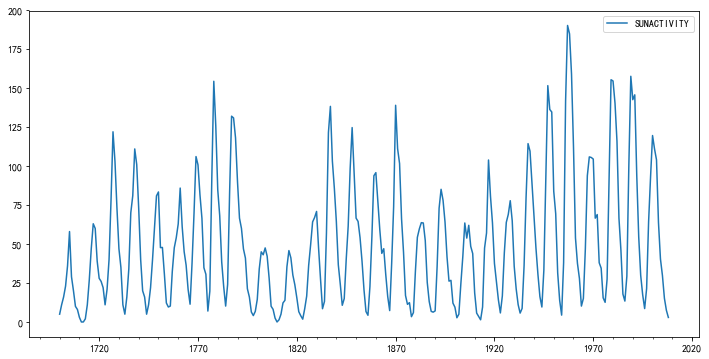

In [5]:
from __future__ import print_function
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.graphics.api import qqplot

#导入数据并作图
dta = sm.datasets.sunspots.load_pandas().data
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
del dta["YEAR"]
dta.plot(figsize=(12,6))
plt.show()

**参数估计**

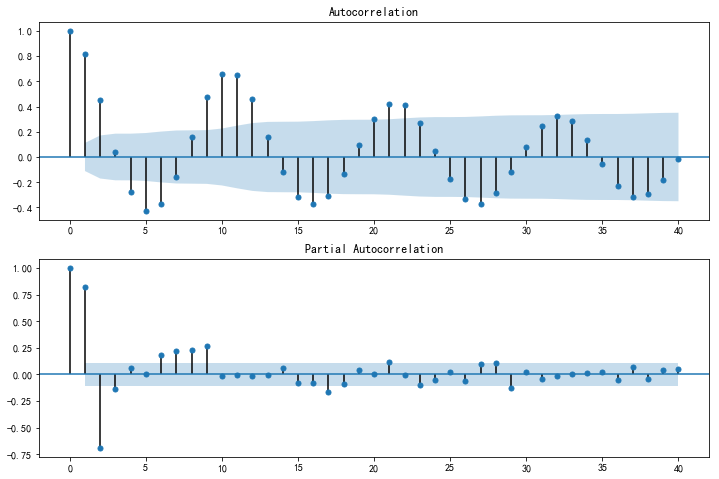

In [6]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)

**拟合模型并评估**

In [7]:
arma_mod20 = sm.tsa.ARMA(dta, (2,0)).fit(disp=False)
print(arma_mod20.params)

const                49.659343
ar.L1.SUNACTIVITY     1.390656
ar.L2.SUNACTIVITY    -0.688571
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\s

In [8]:
arma_mod30 = sm.tsa.ARMA(dta, (3,0)).fit(disp=False)
print(arma_mod20.aic, arma_mod20.bic, arma_mod20.hqic)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)


2622.6363380639814 2637.569703171572 2628.6067259092274


In [9]:
print(arma_mod30.params)

const                49.749929
ar.L1.SUNACTIVITY     1.300810
ar.L2.SUNACTIVITY    -0.508093
ar.L3.SUNACTIVITY    -0.129650
dtype: float64


In [10]:
print(arma_mod30.aic, arma_mod30.bic, arma_mod30.hqic)

2619.403628696475 2638.070335080964 2626.8666135030326


**假设检验**

In [11]:
sm.stats.durbin_watson(arma_mod30.resid.values) #D-W检验

1.9564808578936077

NormaltestResult(statistic=49.84502966847133, pvalue=1.500684276916863e-11)

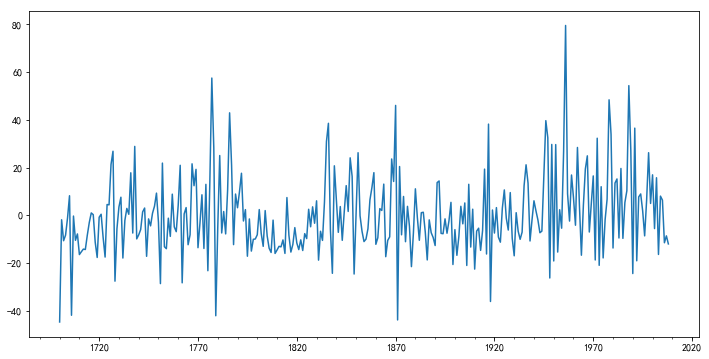

In [14]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
ax = arma_mod30.resid.plot(ax=ax) #残差正态
resid = arma_mod30.resid
stats.normaltest(resid)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


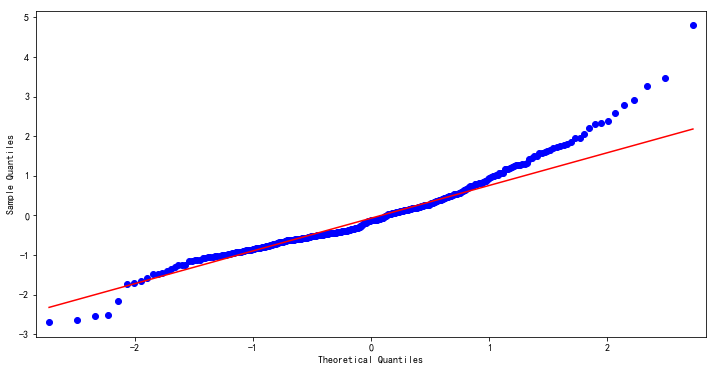

In [15]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
fig = qqplot(resid, line='q', ax=ax, fit=True)

**模型预测**

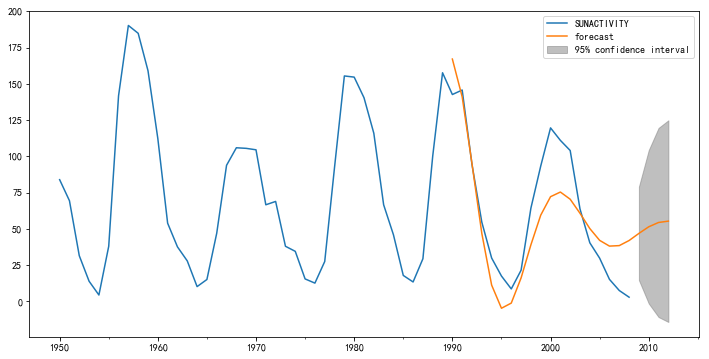

In [17]:
predict_sunspots = arma_mod30.predict('1990', '2012', dynamic=True)
fig, ax = plt.subplots(figsize=(12, 6))
ax = dta.loc['1950':].plot(ax=ax)
fig = arma_mod30.plot_predict('1990', '2012', dynamic=True, ax=ax, plot_insample=False)

# Time Series Analysis by State Space Methods statespace(基于状态空间方法的时间序列分析)

http://www.statsmodels.org/stable/statespace.html

**模型意义**

状态空间模型起源于平稳时间序列分析。当用于非平稳时间序列分析时需要将非平稳时间序列分解为随机游走成分(趋势)和弱平稳成分两个部分分别建模。 含有随机游走成分的时间序列又称积分时间序列，因为随机游走成分是弱平稳成分的和或积分。当一个向量值积分序列中的某些序列的线性组合变成弱平稳时就称这些序列构成了协调积分(cointegrated)过程。 非平稳时间序列的线性组合可能产生平稳时间序列这一思想可以追溯到回归分析，Granger提出的协调积分概念使这一思想得到了科学的论证。 Aoki和Cochrane等人的研究表明：很多非平稳多变量时间序列中的随机游走成分比以前人们认为的要小得多，有时甚至完全消失。百度百科

**状态空间模型的建立和预测的步骤**

为了避免由于状态空间模型的不可控制性而导致的错误的分解形式，当对一个单整时间序列建立状态空间分解模型并进行预测，应按下面的步骤执行：
(1) 对相关的时间序列进行季节调整，并将季节要素序列外推；

(2) 对季节调整后的时间序列进行单位根检验，确定单整阶数，然后在ARIMA过程中选择最接近的模型；

(3) 求出ARIMA模型的系数；

(4) 用ARIMA模型的系数准确表示正规状态空间模型，检验状态空间模型的可控制性；

(5) 利用Kalman滤波公式估计状态向量，并对时间序列进行预测。

(6) 把外推的季节要素与相应的预测值合并，就得到经济时间序列的预测结果

In [21]:
from statsmodels.tsa import statespace

# Vector Autoregressions tsa.vector_ar(矢量自动回归)

http://www.statsmodels.org/stable/vector_ar.html

向量自回归（VAR）是基于数据的统计性质建立模型，VAR模型把系统中每一个内生变量作为系统中所有内生变量的滞后值的函数来构造模型，从而将单变量自回归模型推广到由多元时间序列变量组成的“向量”自回归模型。VAR模型是处理多个相关经济指标的分析与预测最容易操作的模型之一，并且在一定的条件下，多元MA和ARMA模型也可转化成VAR模型，因此近年来VAR模型受到越来越多的经济工作者的重视。

**VAR进程(VAR processes)**

VAR(p)建立T×K多变量时间序列Y，T为观测数量，K为变量数量。
估计时间序列与其滞后值之间关系的向量自回归过程为：
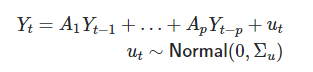

Ai是一个 K×K 系数矩阵

**模型拟合(Model fitting)**

statsmodels.tsa.api

In [1]:
import numpy as np
import pandas
import statsmodels.api as sm
from statsmodels.tsa.api import VAR, DynamicVAR
mdata = sm.datasets.macrodata.load_pandas().data
dates = mdata[['year', 'quarter']].astype(int).astype(str)
quarterly = dates["year"] + "Q" + dates["quarter"]
from statsmodels.tsa.base.datetools import dates_from_str
quarterly = dates_from_str(quarterly)
mdata = mdata[['realgdp','realcons','realinv']]
mdata.index = pandas.DatetimeIndex(quarterly)
data = np.log(mdata).diff().dropna()
model = VAR(data)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)


**注意：本VAR类假定通过时间序列是静止的。非静态或趋势数据通常可以通过第一差分或一些其他方法变换为静止的。对于非平稳时间序列的直接分析，标准稳定VAR（p）模型是不合适的。**

In [2]:
results = model.fit(2)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 28, Oct, 2019
Time:                     15:16:22
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -27.5830
Nobs:                     200.000    HQIC:                  -27.7892
Log likelihood:           1962.57    FPE:                7.42129e-13
AIC:                     -27.9293    Det(Omega_mle):     6.69358e-13
--------------------------------------------------------------------
Results for equation realgdp
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.001527         0.001119            1.365           0.172
L1.realgdp         -0.279435         0.169663           -1.647           0.100
L1.realcons         0.675016         0.131285            5.142    

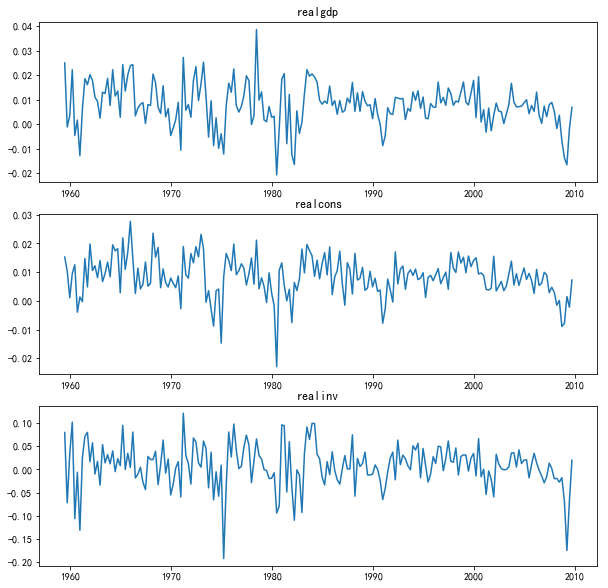

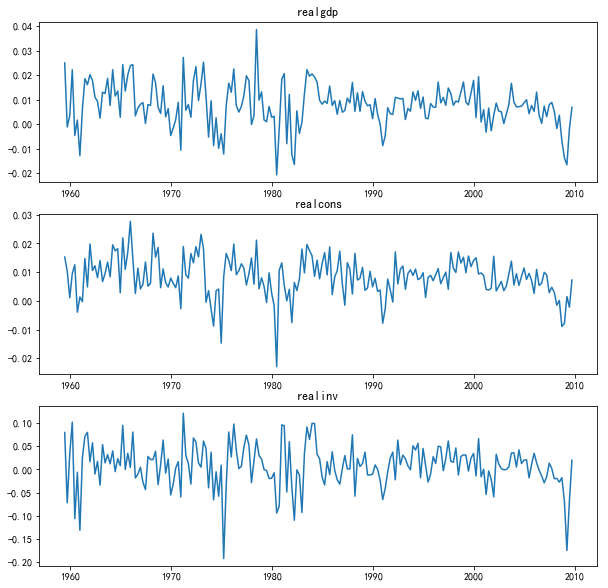

In [3]:
results.plot()

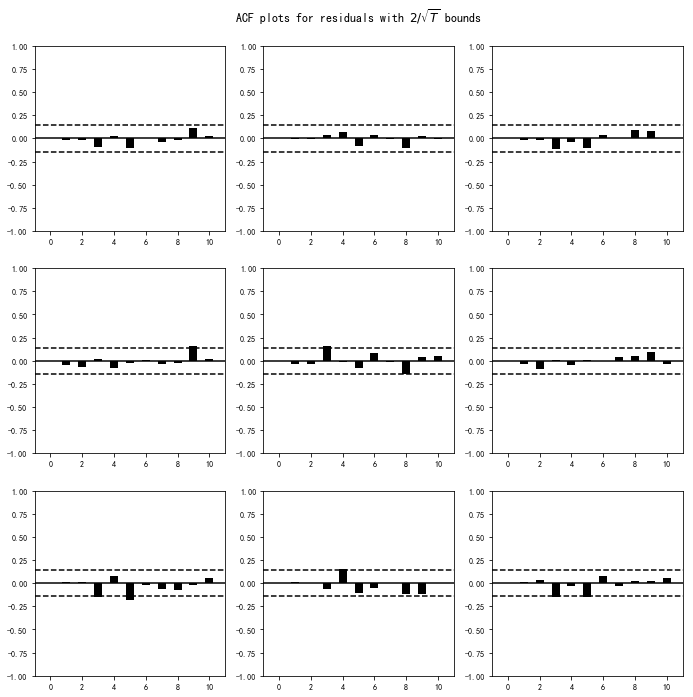

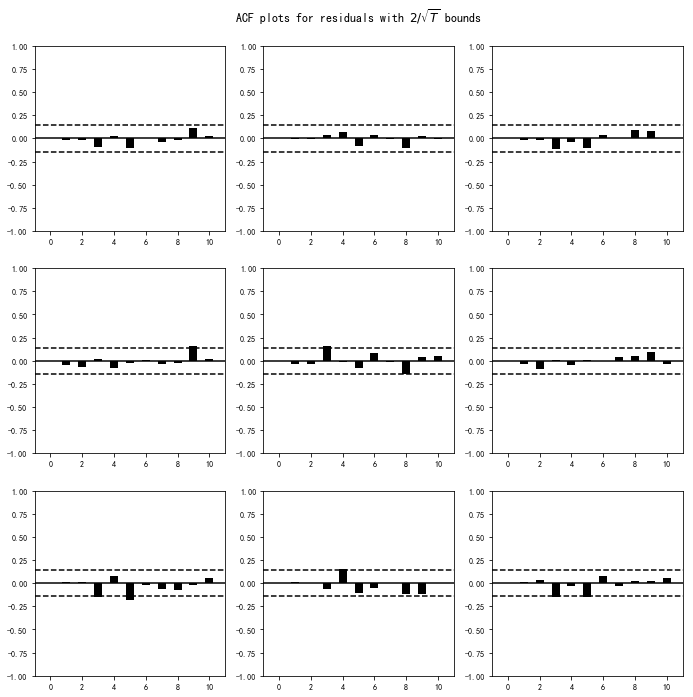

In [4]:
#绘制时间序列自相关函数：
results.plot_acorr()

**滞后顺序选择(Lag order selection)**

滞后顺序的选择可能是一个难题。标准分析采用可能性测试或基于信息标准的顺序选择。我们已经实现了后者，可通过VAR模型访问：

In [6]:
model.select_order(15)
# 调用fit函数时，可以传递最大滞后数和order标准以用于order选择
results = model.fit(maxlags = 15,ic = 'aic')

**预测(Forecasting)**

就均方误差而言，线性预测器是最优的 h-step 提前预测：

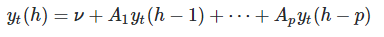

我们可以使用预测函数来生成此预测。请注意，我们必须为预测指定“初始值”：

In [8]:
lag_order = results.k_ar
results.forecast(data.values[-lag_order:],5)

array([[ 0.00616044,  0.00500006,  0.00916198],
       [ 0.00427559,  0.00344836, -0.00238478],
       [ 0.00416634,  0.0070728 , -0.01193629],
       [ 0.00557873,  0.00642784,  0.00147152],
       [ 0.00626431,  0.00666715,  0.00379567]])

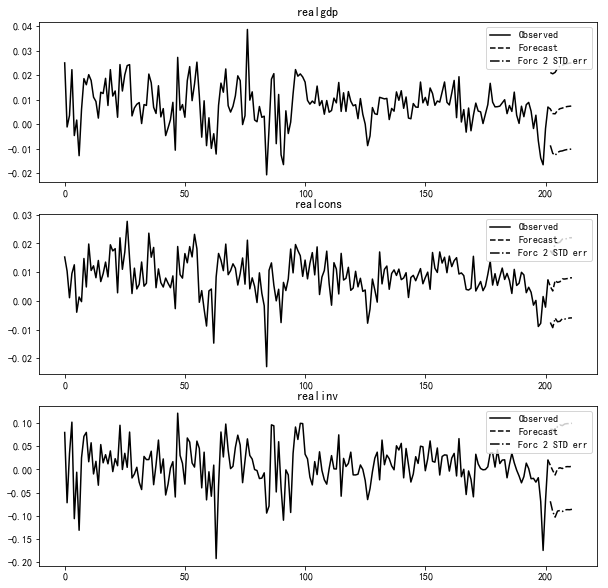

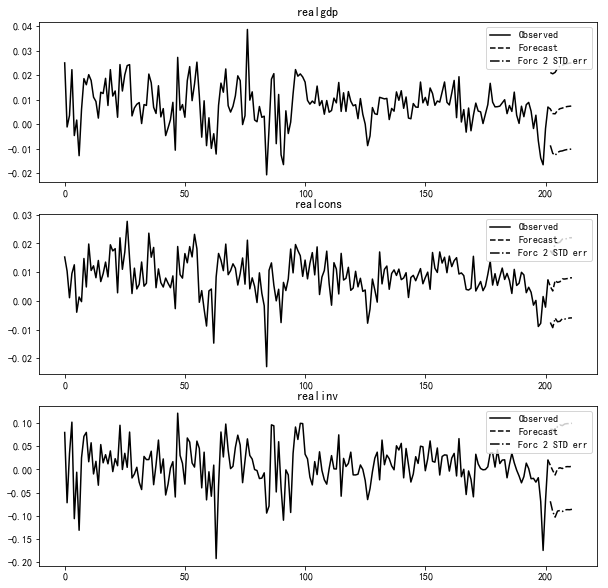

In [9]:
results.plot_forecast(10)

**脉冲响应分析(Impulse Response Analysis)**

在计量经济学研究中，脉冲响应是有意义的：它们是对其中一个变量中单位脉冲的估计响应。它们是在实践中使用MA(∞)计算VAR(p)过程：
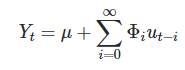
我们可以通过调用VARResults对象上的irf函数来执行脉冲响应分析：

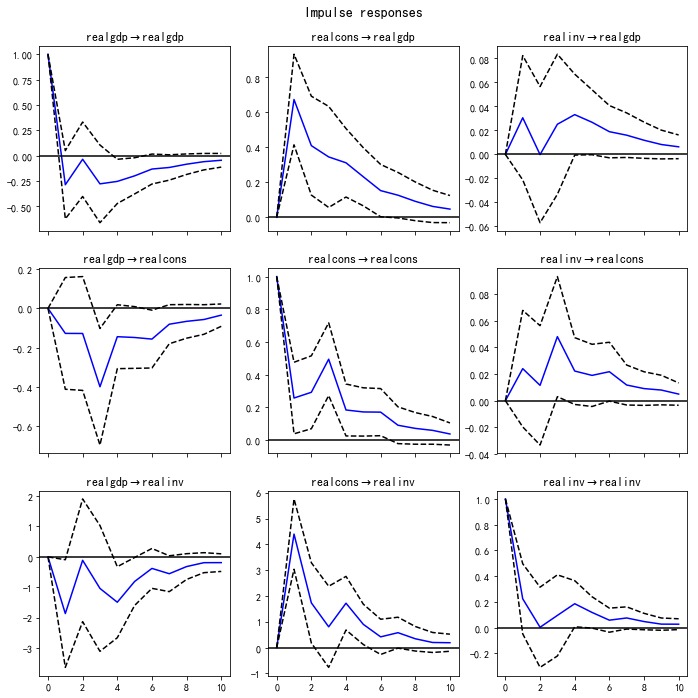

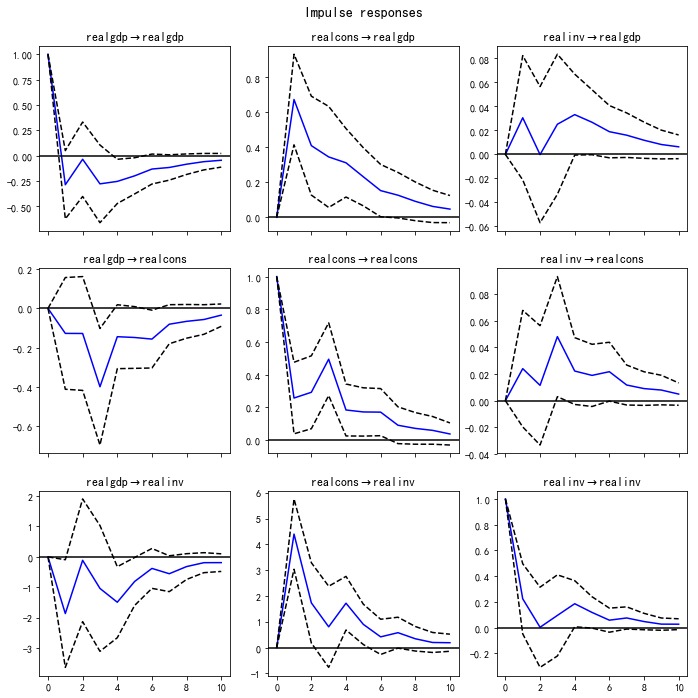

In [11]:
irf = results.irf(10)
#这些可以使用绘图函数以正交或非正交形式可视化。
#默认情况下，渐近标准误差绘制在95％显着性水平，可由用户修改。
irf.plot(orth=False)

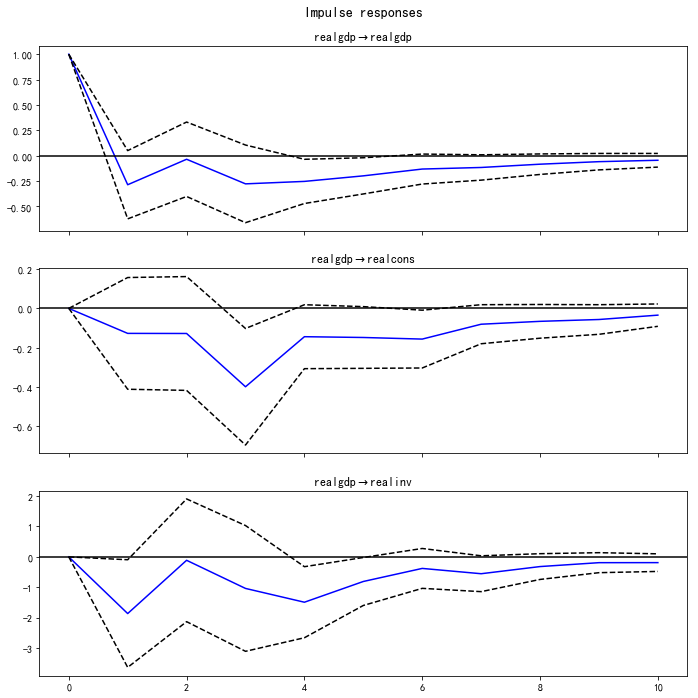

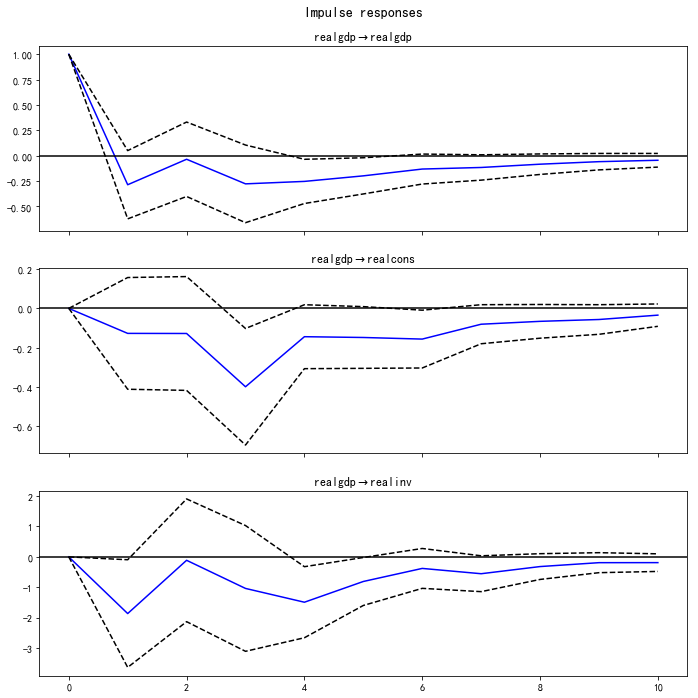

In [12]:
#绘图功能非常灵活，如果需要，只能绘制感兴趣的变量
irf.plot(impulse='realgdp')

累积效应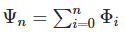
可以用长期运行效果绘制：

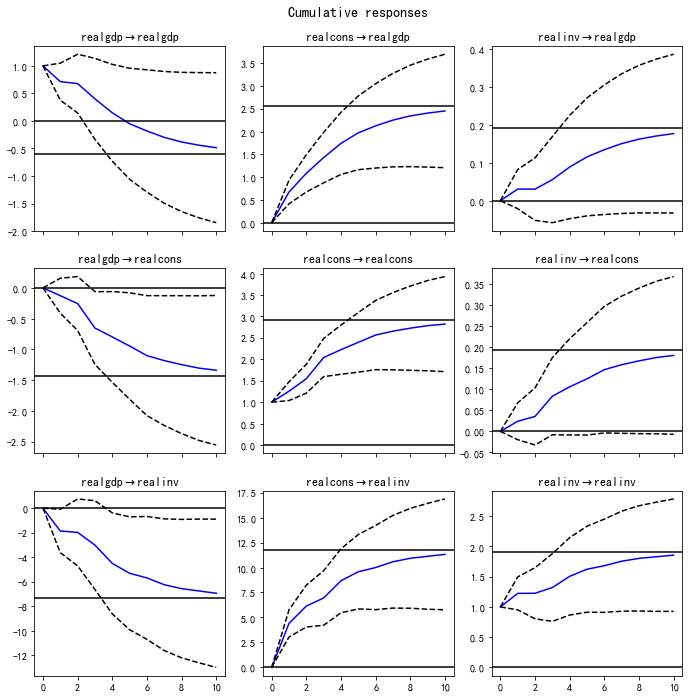

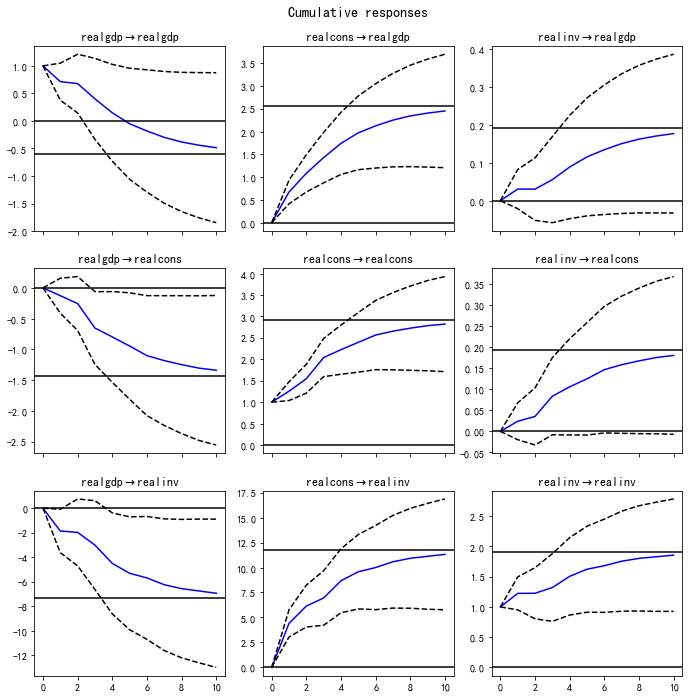

In [13]:
irf.plot_cum_effects(orth = False)

**预测误差方差分解(FEVD)**

可以使用正交化脉冲响应来分解在i-step预测中k上的分量j的预测误差 Θi:
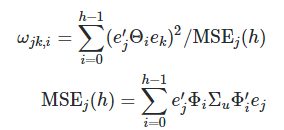
通过fevd函数向前总计步数计算

In [14]:
fevd = results.fevd(5)
fevd.summary()

FEVD for realgdp
      realgdp  realcons   realinv
0    1.000000  0.000000  0.000000
1    0.864889  0.129253  0.005858
2    0.816725  0.177898  0.005378
3    0.793647  0.197590  0.008763
4    0.777279  0.208127  0.014594

FEVD for realcons
      realgdp  realcons   realinv
0    0.359877  0.640123  0.000000
1    0.358767  0.635420  0.005813
2    0.348044  0.645138  0.006817
3    0.319913  0.653609  0.026478
4    0.317407  0.652180  0.030414

FEVD for realinv
      realgdp  realcons   realinv
0    0.577021  0.152783  0.270196
1    0.488158  0.293622  0.218220
2    0.478727  0.314398  0.206874
3    0.477182  0.315564  0.207254
4    0.466741  0.324135  0.209124




它们也可以通过返回的FEVD对象可视化

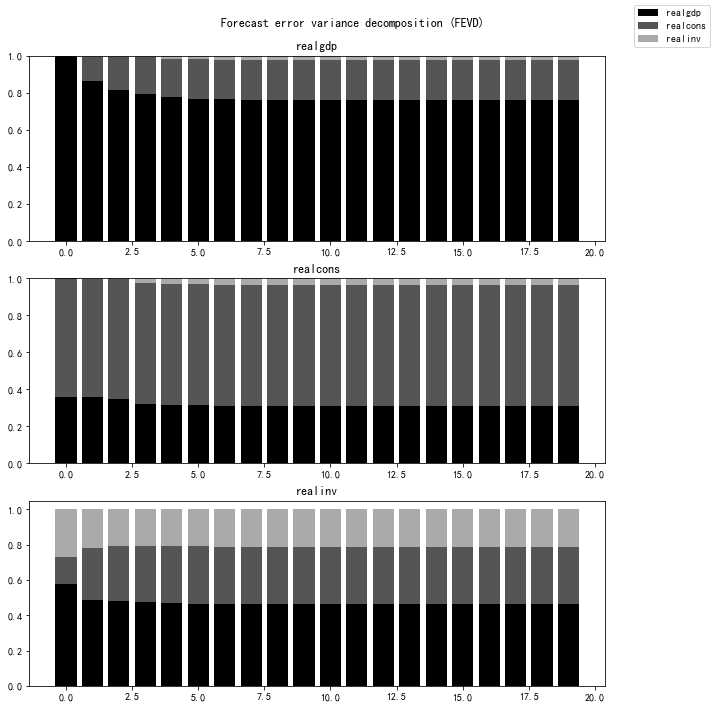

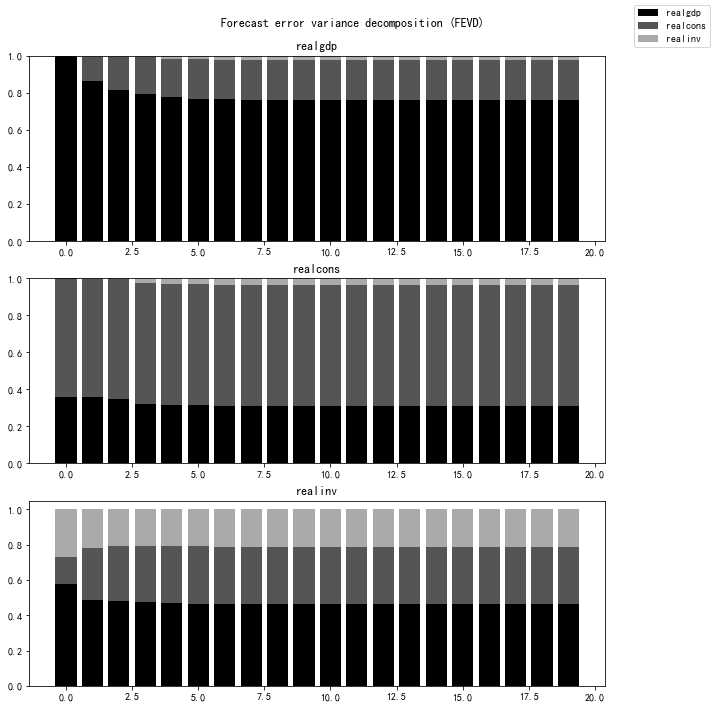

In [15]:
results.fevd(20).plot()

**统计检验(Statistical tests)**

提供了许多不同的方法来进行关于模型结果的假设检验以及模型假设的正确性(normality, whiteness / “iid-ness” of errors, etc)

    **格兰杰因果关系(Granger causality)**

    格兰杰本人在其2003年获奖演说中强调了其引用的局限性，以及“很多荒谬论文的出现”（Of course, many ridiculous papers appeared）。由于其统计学本质上是对平稳时间序列数据一种预测，仅适用于计量经济学的变量预测，不能作为检验真正因果性的判据。
    在时间序列情形下，两个经济变量X、Y之间的格兰杰因果关系定义为：若在包含了变量X、Y的过去信息的条件下，对变量Y的预测效果要优于只单独由Y的过去信息对Y进行的预测效果，即变量X有助于解释变量Y的将来变化，则认为变量X是引致变量Y的格兰杰原因。
    进行格兰杰因果关系检验的一个前提条件是时间序列必须具有平稳性，否则可能会出现虚假回归问题。因此在进行格兰杰因果关系检验之前首先应对各指标时间序列的平稳性进行单位根检验(unit root test)。常用增广的迪基—富勒检验(ADF检验)来分别对各指标序列的平稳性进行单位根检验

In [16]:
 results.test_causality('realgdp', ['realinv', 'realcons'], kind='f')

## 动态矢量自动回归(Dynamic Vector Autoregressions)

人们通常对估计时间序列数据的移动窗口回归感兴趣，以便在整个数据样本中进行预测。例如，我们可能希望生成由每个时间点估计的VAR(p)模型产生的一系列两步预测。

In [20]:
np.random.seed(1)
import pandas.util.testing as ptest
ptest.N = 500
data = ptest.makeTimeDataFrame().cumsum(0)
print(data.head())
var = DynamicVAR(data, lag_order=2, window_type='expanding')

                   A         B         C         D
2000-01-03  1.624345 -1.719394 -0.153236  1.301225
2000-01-04  1.012589 -1.662273 -2.585745  0.988833
2000-01-05  0.484417 -2.461821 -2.077760  0.717604
2000-01-06 -0.588551 -2.753416 -2.401793  2.580517
2000-01-07  0.276856 -3.012398 -3.912869  1.937644


动态模型的估计系数作为pandas.Panel对象返回 ，这可以让您轻松地按等式或按日期检查所有模型系数：

In [23]:
import datetime as dt
var.coefs

<class 'pandas.core.panel.Panel'>
Dimensions: 9 (items) x 489 (major_axis) x 4 (minor_axis)
Items axis: L1.A to intercept
Major_axis axis: 2000-01-18 00:00:00 to 2001-11-30 00:00:00
Minor_axis axis: A to D

In [24]:
var.coefs.minor_xs('A').info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 489 entries, 2000-01-18 to 2001-11-30
Freq: B
Data columns (total 9 columns):
L1.A         489 non-null float64
L1.B         489 non-null float64
L1.C         489 non-null float64
L1.D         489 non-null float64
L2.A         489 non-null float64
L2.B         489 non-null float64
L2.C         489 non-null float64
L2.D         489 non-null float64
intercept    489 non-null float64
dtypes: float64(9)
memory usage: 58.2 KB


In [25]:
var.coefs.major_xs(dt.datetime(2001, 11, 30)).T

,A,B,C,D
L1.A,0.971964,0.045960,0.003883,0.003822
L1.B,0.043951,0.937964,0.000735,0.020823
L1.C,0.038144,0.018260,0.977037,0.129287
L1.D,0.038618,0.036180,0.052855,1.002657
L2.A,0.013588,-0.046791,0.011558,-0.005300
L2.B,-0.048885,0.041853,0.012185,-0.048732
L2.C,-0.029426,-0.015238,0.011520,-0.119014
L2.D,-0.049945,-0.025419,-0.045621,-0.019496
intercept,0.113331,0.248795,-0.058837,-0.089302


可以使用plot_forecast显示预测：

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\vector_ar\dynamic.py:264: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  coef_panel = self.coefs.copy()
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\vector_ar\dynamic.py:267: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  coef_values = coef_panel.swapaxes('items', 'major')

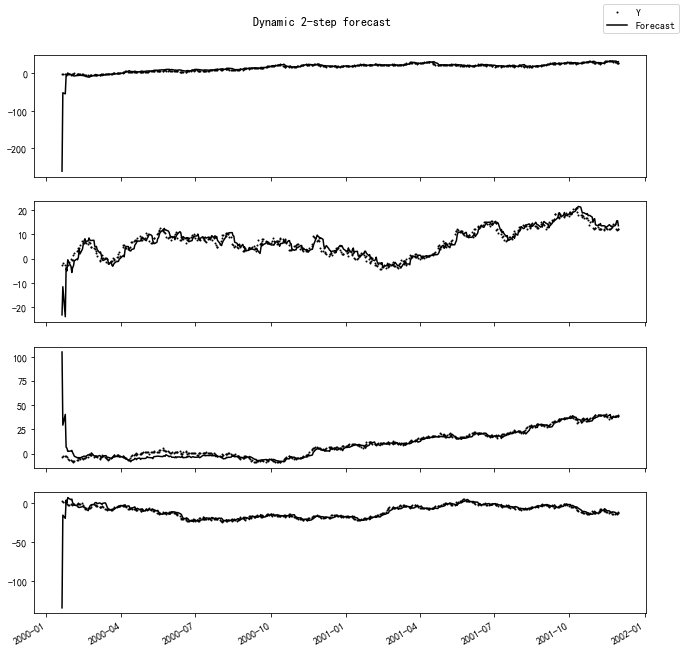

In [26]:
var.plot_forecast(2)

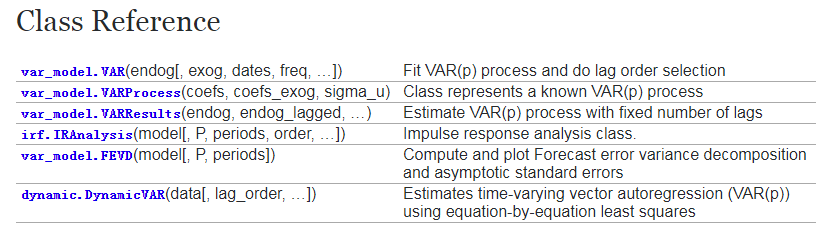